## Lab01(op1)
> `L2`，`Dropout`方法通过减少对训练集的拟合，提升在测试集的准确率

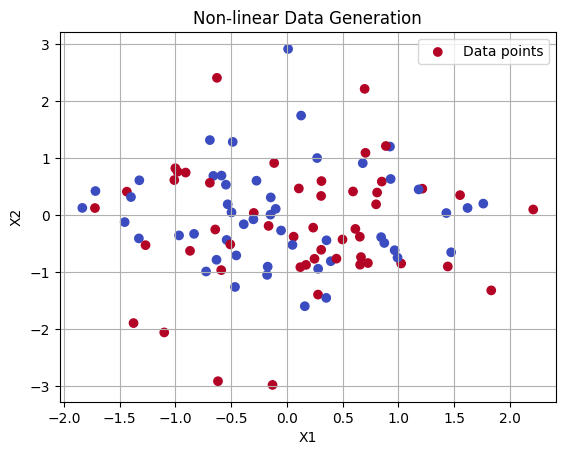

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

X = torch.randn(100, 2)
y = torch.randint(0, 2, (100,))  # 二分类标签（0或1）

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', label='Data points')

plt.title('Non-linear Data Generation')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
class SimpleNNWithDropout(nn.Module):
    def __init__(self, use_dropout=False, dropout_prob=0):
        super(SimpleNNWithDropout, self).__init__()
        self.use_dropout = use_dropout
        if self.use_dropout:
            self.dropout = nn.Dropout(p=dropout_prob)

        self.fc1 = nn.Linear(2, 50)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(50, 30)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(30, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)

        if self.use_dropout:
            x = self.dropout(x)

        x = self.fc2(x)
        x = self.relu2(x)

        if self.use_dropout:
            x = self.dropout(x)

        x = self.fc3(x)
        return x

In [3]:
batch_size = 10
num_epochs = 200
lrate = 0.001
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

在没有使用`Dropout`方法时模型在测试集的准确率

In [ ]:
model = SimpleNNWithDropout()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lrate)

losses_without_Dropout = []
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    batch_count = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()  # 累加每个 batch 的损失
        batch_count += 1

    # 计算并记录每个 epoch 的平均损失
    avg_loss = epoch_loss / batch_count
    losses_without_Dropout.append(avg_loss)
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

model.eval()  # 禁用 Dropout
with torch.no_grad():
    X, y = X.to(device), y.to(device)
    test_outputs = model(X)
    test_loss = criterion(test_outputs, y)
    print(f'Test Loss: {test_loss.item():.4f}')

使用`Dropout`方法并且`Dropout_p = 0.3`时模型在测试集的准确率

In [ ]:
model = SimpleNNWithDropout(True, 0.3)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lrate)

losses_with_Dropout = []
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    batch_count = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()  # 累加每个 batch 的损失
        batch_count += 1

    # 计算并记录每个 epoch 的平均损失
    avg_loss = epoch_loss / batch_count
    losses_with_Dropout.append(avg_loss)
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

model.eval()  # 禁用 Dropout
with torch.no_grad():
    X, y = X.to(device), y.to(device)
    test_outputs = model(X)
    test_loss = criterion(test_outputs, y)
    print(f'Test Loss: {test_loss.item():.4f}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # 设置图形大小
plt.plot(range(len(losses_without_Dropout)), losses_without_Dropout, label='Loss without Dropout', color='b')  # 绘制第一条曲线
plt.plot(range(len(losses_with_Dropout)), losses_with_Dropout, label='Loss with Dropout (p=0.3)',  color='r')  # 绘制第二条曲线

# 添加标题和坐标轴标签
plt.title('Loss: Dropout vs. Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# 添加图例
plt.legend()

# 显示图形
plt.grid()  # 添加网格
plt.show()


`L2`正则化

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)  # L2正则化，weight_decay=0.001
model = SimpleNNWithDropout()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lrate)

losses = []
model.train()
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()  # 禁用 Dropout
with torch.no_grad():
    X, y = X.to(device), y.to(device)
    test_outputs = model(X)
    test_loss = criterion(test_outputs, y)
    print(f'Test Loss: {test_loss.item():.4f}')

In [ ]:
plt.figure(figsize=(12, 8))  # 设置图形大小
plt.plot(range(len(losses)), losses, label='Loss without Dropout', color='b')  # 绘制第一条曲线
plt.title('Loss: L2')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# 添加图例
plt.legend()

# 显示图形
plt.grid()  # 添加网格
plt.show()